You have different tasks to finish within the day. 7 am is the earliest time and 10 pm is the latest time of the day to finish all the tasks. Since each time block is 30', there are (15 hours)*(2 blocks/hour)= 30 blocks. Each task takes different amount of time to complete and different important score. Given that there are scheduled meetings during the day that you cannot assign the tasks.  How do you assign the tasks to maximize the productivty? Note: Since there is limited time per day, you don't need to assign every task in one day, the goal is not to fit every task but to maximize the total score

In [3]:
import pandas as pd
tasks = pd.read_csv('tasks.csv')
tasks

,Task name,Important score (1-5),Time to finish,Num of blocks
0,Complete math homework,4,60,2
1,Study for the Physics quiz,5,120,4
2,Coffee with Taylor,1,60,2
3,Read book,3,30,1
4,Complete programming project,3,150,5
5,Reply to emails,2,30,1
6,Finish essay,2,120,4
7,Watch movie,1,90,3
8,Call mom,2,30,1


In [4]:
schedule = pd.read_csv('schedule.csv')['Availability']
schedule

0     0
1     0
2     0
3     0
4     0
5     0
6     1
7     1
8     1
9     0
10    0
11    1
12    1
13    1
14    0
15    0
16    0
17    0
18    1
19    1
20    1
21    0
22    0
23    0
24    0
25    1
26    1
27    1
28    1
29    1
Name: Availability, dtype: int64

# Input parameters:

$s_i$: important score of task $i$

$d_i$: number of time blocks needed to finish task $i$

$b_t$: availability of time block \; $b \in \{0,1\}  $

$B$: total number of time blocks 

$n$: total number of tasks

In [5]:
s = list(tasks['Important score (1-5)'])

d = list(tasks['Num of blocks'])

b = list(schedule)

In [7]:
B = len(b)
n = len(s)

In [10]:
#Time blocks available
A = sum(b)

In [11]:
from pulp import *

$\text{Maximize} \;\; \sum_{i=1}^{n}\sum_{t=1}^{B} s_{i}y_{it}$

In [12]:
prob = LpProblem("Schedule_Tasks",LpMaximize)

Decision variables:

Whether or not to assign the task in a specific block of time

$y_{it}$ = 1 if task $i$ is assigned to time $t$, 0 otherwise

In [13]:
#Define variable
y = LpVariable.dicts('Block', [(i,t) for i in range(n) for t in range(B)],
                    cat='Binary')

In [14]:
#Define objective
prob += lpSum(s[i]*b[t]*y[(i,t)] for i in range(n) for t in range(B))

# Constraints:

Sum of the time blocks of the assigned tasks should be not greater than the number of available time blocks

$\sum_{i=1}^{n}\sum_{t=1}^{B} y_{it} \leq A$ (1) 

Total number of time blocks assigned for each task should not be greater than the time needed to finish the task

$\sum_{t=1}^{B} y_{it} \leq d_i \;; \forall i = 1, 2, ..., n$ (2)

No more than one task each block

$\sum_{i=1}^{n} y_{it} \leq 1 \;; \forall t = 1, 2, ..., B$ (3)

In [15]:
prob += lpSum(y[(i,t)] for i in range(n) for t in range(B)) <= A #1


for i in range(n):
    prob += lpSum(y[(i,t)] for t in range(B)) <= d[i] #2

for t in range(B):
    prob += lpSum(y[(i,t)] for i in range(n)) <= 1 #3


In [16]:
prob.solve()

1

In [17]:
import numpy as np
tasks = np.zeros((n,B))
chosen_tasks = []
print("Assignment accomplished!")
for i in range(n):
    for t in range(B):
        tasks[i][t]= y[(i,t)].varValue*(i+1)
        if y[(i,t)].varValue == 1:
            if i+1 not in chosen_tasks:
                chosen_tasks.append(i+1)
        
print('Chosen tasks are: {}'.format(chosen_tasks))



Assignment accomplished!
Chosen tasks are: [1, 2, 4, 5, 7]


In [18]:
tasks

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 2., 0., 0., 0., 0., 0., 0., 2., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 2., 2., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 4., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 5., 0., 0., 5., 0., 0., 0., 0.,
        0., 0., 0., 5., 0., 0., 0., 0., 0., 0., 0., 0., 5., 5.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 7., 0., 0., 0., 0., 0., 0., 0., 0., 7., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0

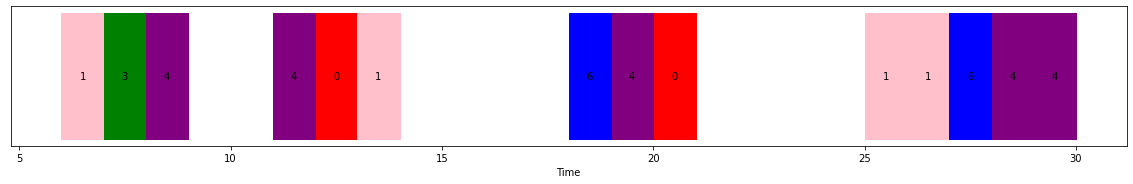

In [19]:
import numpy as np

import matplotlib.pyplot as plt
fig = plt.figure(figsize = (20,20))
#1x1 grid, first subplot
ax = fig.add_subplot(111)
#Make the y-axis invisible
ax.axes.get_yaxis().set_visible(False)
#Set the ratio of y-unit to x-unit
ax.set_aspect(1)

def avg(a, b):
    return (a + b) / 2.0

#y is the order of row, row is the data of the rows
for y, row in enumerate(tasks):
    for x, col in enumerate(row):
        x1 = [x, x+1]
        y1 = [0, 0]
        y2 = [3, 3]
            
        if col == 1:
            #Fill the area between two horizontal curves.
            plt.fill_between(x1, y1, y2=y2, color='red')
            #Fill the text in the middle of 2 units in x and y-axis
            plt.text(avg(x1[0], x1[1]), avg(y1[0],y2[0]), "0",
                    horizontalalignment='center', verticalalignment='center')
        
        if col == 2 :
            #Fill the area between two horizontal curves.
            plt.fill_between(x1, y1, y2=y2, color='pink')
            #Fill the text in the middle of 2 units in x and y-axis
            plt.text(avg(x1[0], x1[1]), avg(y1[0],y2[0]), "1",
                    horizontalalignment='center', verticalalignment='center')

        if col == 4:
            #Fill the area between two horizontal curves.
            plt.fill_between(x1, y1, y2=y2, color='green')
            #Fill the text in the middle of 2 units in x and y-axis
            plt.text(avg(x1[0], x1[1]), avg(y1[0],y2[0]), "3",
                    horizontalalignment='center', verticalalignment='center')

        if col == 5:
            #Fill the area between two horizontal curves.
            plt.fill_between(x1, y1, y2=y2, color='purple')
            #Fill the text in the middle of 2 units in x and y-axis
            plt.text(avg(x1[0], x1[1]), avg(y1[0],y2[0]), "4",
                    horizontalalignment='center', verticalalignment='center')
            
        if col == 7:
            #Fill the area between two horizontal curves.
            plt.fill_between(x1, y1, y2=y2, color='blue')
            #Fill the text in the middle of 2 units in x and y-axis
            plt.text(avg(x1[0], x1[1]), avg(y1[0],y2[0]), "6",
                    horizontalalignment='center', verticalalignment='center')
        
            
ax.set_xlabel('Time')
plt.show()

        
        
        

In [20]:
pulp.value(prob.objective) 

50.0

In [21]:
prob.writeLP('task_problem.lp')

Questions:
-Is it necessary to complete one task in one day when get started?
-How to make the tasks continuous once get started but doesn't need to finish on the same day if the time does not allow?
    +precedence constraints (Single Machine Scheduling): One task cannot start until another task starts
    +No overlap constraints: One task at a time

Observations:
-The tasks with highest scores would be attempted to fit into the schedule until either time blocks are ran out out the task is finished